# CD73-Positive Cell Spheroid Transplantation Attenuates Colonic Atrophy

Paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10051511/

Data: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE211637

## Introduction

### Description of the study

The goal of the study was to investigate a new treatment of Inflammatory Bowel Disease (IBD) using mesenchymal stem/stromal cells (MSCs). These cells exhibit immunomodulatory functions and are therefore potential candidates for cell transplantation therapy, which is one of the treatments for IBD. 

One of the problems with the proposed approach is that MSCs are highly heterogeneous and therefore the transplantation may not be effective. The authors of the paper decided to obtain a homogeneous population of MSCs using the surface marker Cluster of Differentiation 73 (CD73), which is widely expressed in MSCs, with the hope that the transplantation of these cells would lead to better transplantation outcomes. The authors found that human CD73+ cells exhibited a downregulation of inflammatory gene expression and an upregulation of extracellular matrix-related gene expression, which is what will be investigated here. 

The study also included the investigation of the optimal transplantation method, however this is beyond the scope of the current analysis. 

### Samples used

Human adipose-derived cells were used, specifically:
 - CD73+ cells (label = CD73)
 - conventional heterogeneous MSCs (label = cMSC)

### Research question

Is there a difference in gene expresssion between cMSC and CD73 samples? 

## Step 0: set up the working directory

In [1]:
cd /mnt/storage/$USER/jupyternotebooks/task1

In [2]:
pwd

/mnt/storage/r0769656/jupyternotebooks/task1


## Step 1: get reads

In [3]:
vdb-config -s /repository/user/cache-disabled=true #prevents unnecessary files being saved in the home folder

In [4]:
mkdir fastq_files #make directory to store fastq files

In total, there were 6 samples from 3 individuals. For the purposes of this analysis only 4 samples, from 2 individuals, were selected. 

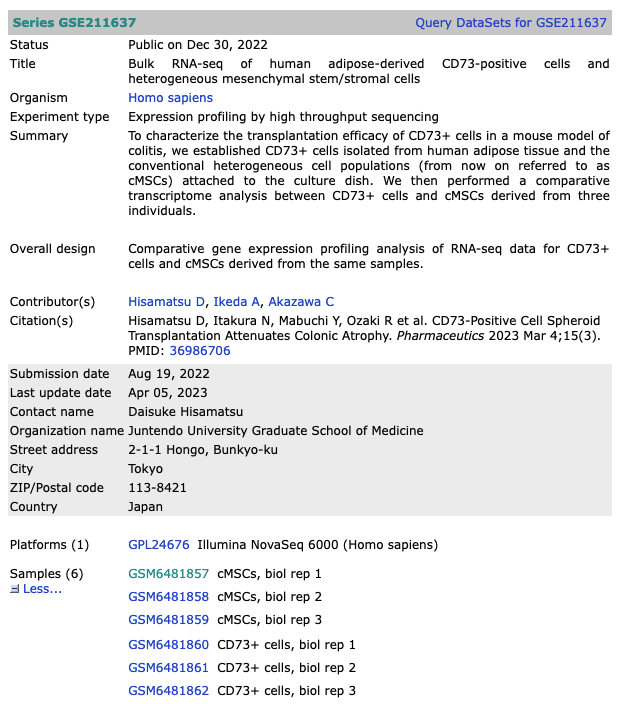

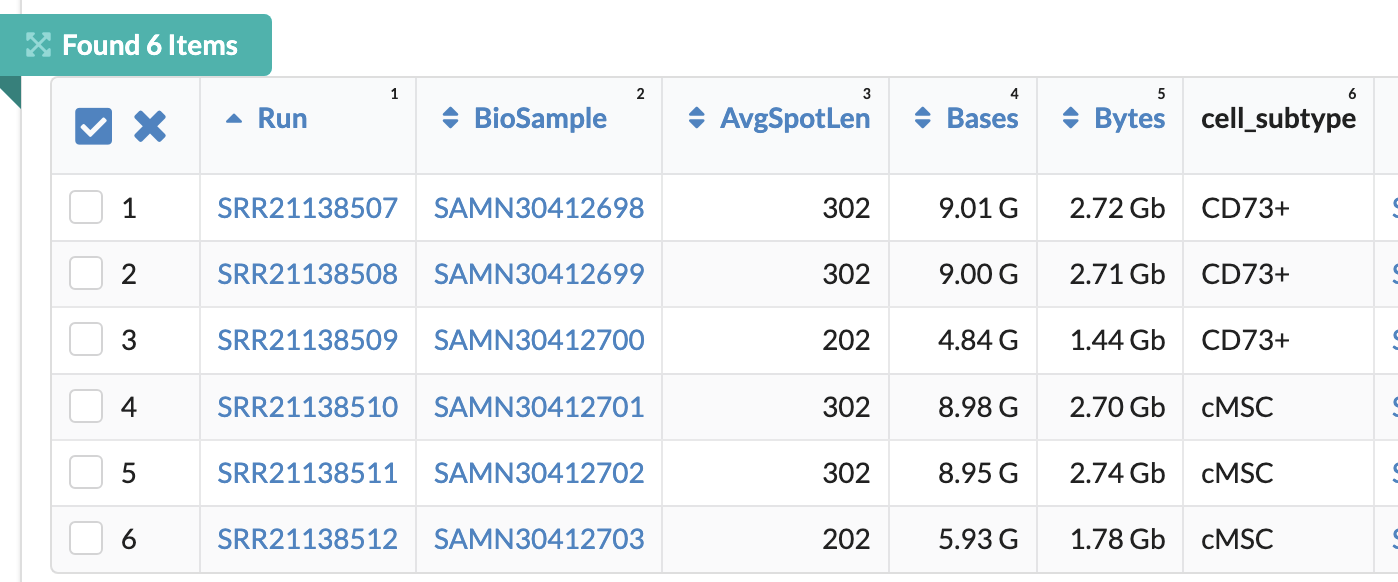

In [5]:
fastq-dump \
    SRR21138507 SRR21138508 \
    SRR21138510 SRR21138511 \
    --split-files \
    --outdir fastq_files \
    --verbose 

Preference setting is: Prefer SRA Normalized Format files with full base quality scores if available.
SRR21138507 is an SRA Normalized Format file with full base quality scores.
Read 29822197 spots for SRR21138507
Written 29822197 spots for SRR21138507
SRR21138508 is an SRA Normalized Format file with full base quality scores.
Read 29785686 spots for SRR21138508
Written 29785686 spots for SRR21138508
SRR21138510 is an SRA Normalized Format file with full base quality scores.
Read 29738597 spots for SRR21138510
Written 29738597 spots for SRR21138510
SRR21138511 is an SRA Normalized Format file with full base quality scores.
Read 29646836 spots for SRR21138511
Written 29646836 spots for SRR21138511


In [6]:
pwd

/mnt/storage/r0769656/jupyternotebooks/task1


Delete the second sample from each (to minimise the necessary storage)

In [7]:
ls fastq_files

SRR21138507_1.fastq  SRR21138510_1.fastq
SRR21138508_1.fastq  SRR21138511_1.fastq


Renaming the files:

In [8]:
mv fastq_files/SRR21138507_1.fastq fastq_files/CD73_1.fastq
mv fastq_files/SRR21138508_1.fastq fastq_files/CD73_2.fastq
mv fastq_files/SRR21138510_1.fastq fastq_files/cMSC_1.fastq
mv fastq_files/SRR21138511_1.fastq fastq_files/cMSC_2.fastq

In [9]:
ls fastq_files

CD73_1.fastq  CD73_2.fastq  cMSC_1.fastq  cMSC_2.fastq


Checking the first line of the first file. Everything is as expected:

In [10]:
head -n4 fastq_files/CD73_1.fastq

@SRR21138507.1 A00718:400:H2YJMDSX3:4:1101:3088:1110 length=151
AATTCAGTCATTTTAGTTTTTGATTGAAAATAAAGGTAGGGCTTCTAAAAACTTCATCATCTTGATAAGTTAAAAAATGAAAGTTATGACATTAGCTTTAAAGGTGTAAAAAAGATGTTTCACTAATGTAACGGTGAAAGAGAATCCCTGT
+SRR21138507.1 A00718:400:H2YJMDSX3:4:1101:3088:1110 length=151
FFFFFFFFFFFFFFFFFFFFFF:FF:FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFF:FFFFFFFFFFFFFFFFF,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFF


### Checking the number of reads for each sample

**CD73_1**

In [11]:
echo $(cat fastq_files/CD73_1.fastq | wc -l)/4 | bc

29822197


Downloaded 29,822,197 reads for CD73_1.fastq, this is consistent with the number on SRA:


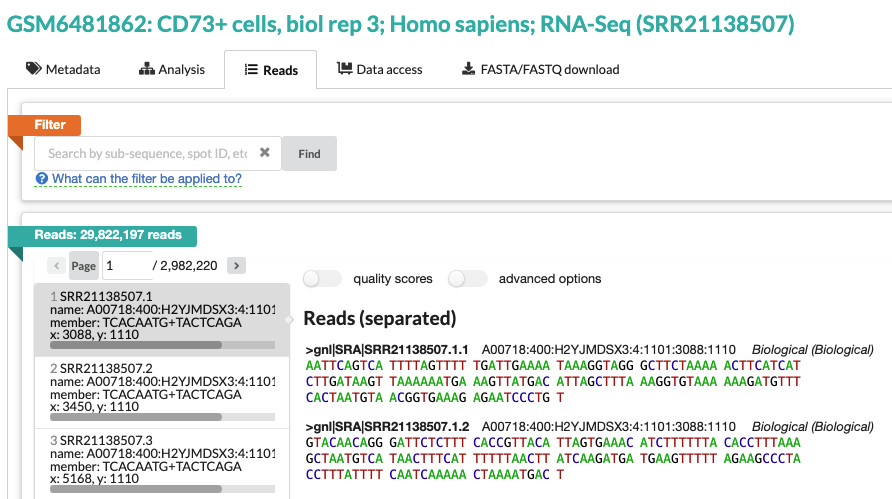

**CD73_2**

In [12]:
echo $(cat fastq_files/CD73_2.fastq | wc -l)/4 | bc

29785686


Downloaded 29,785,686 reads for CD73_2.fastq, this is consistent with the number on SRA:

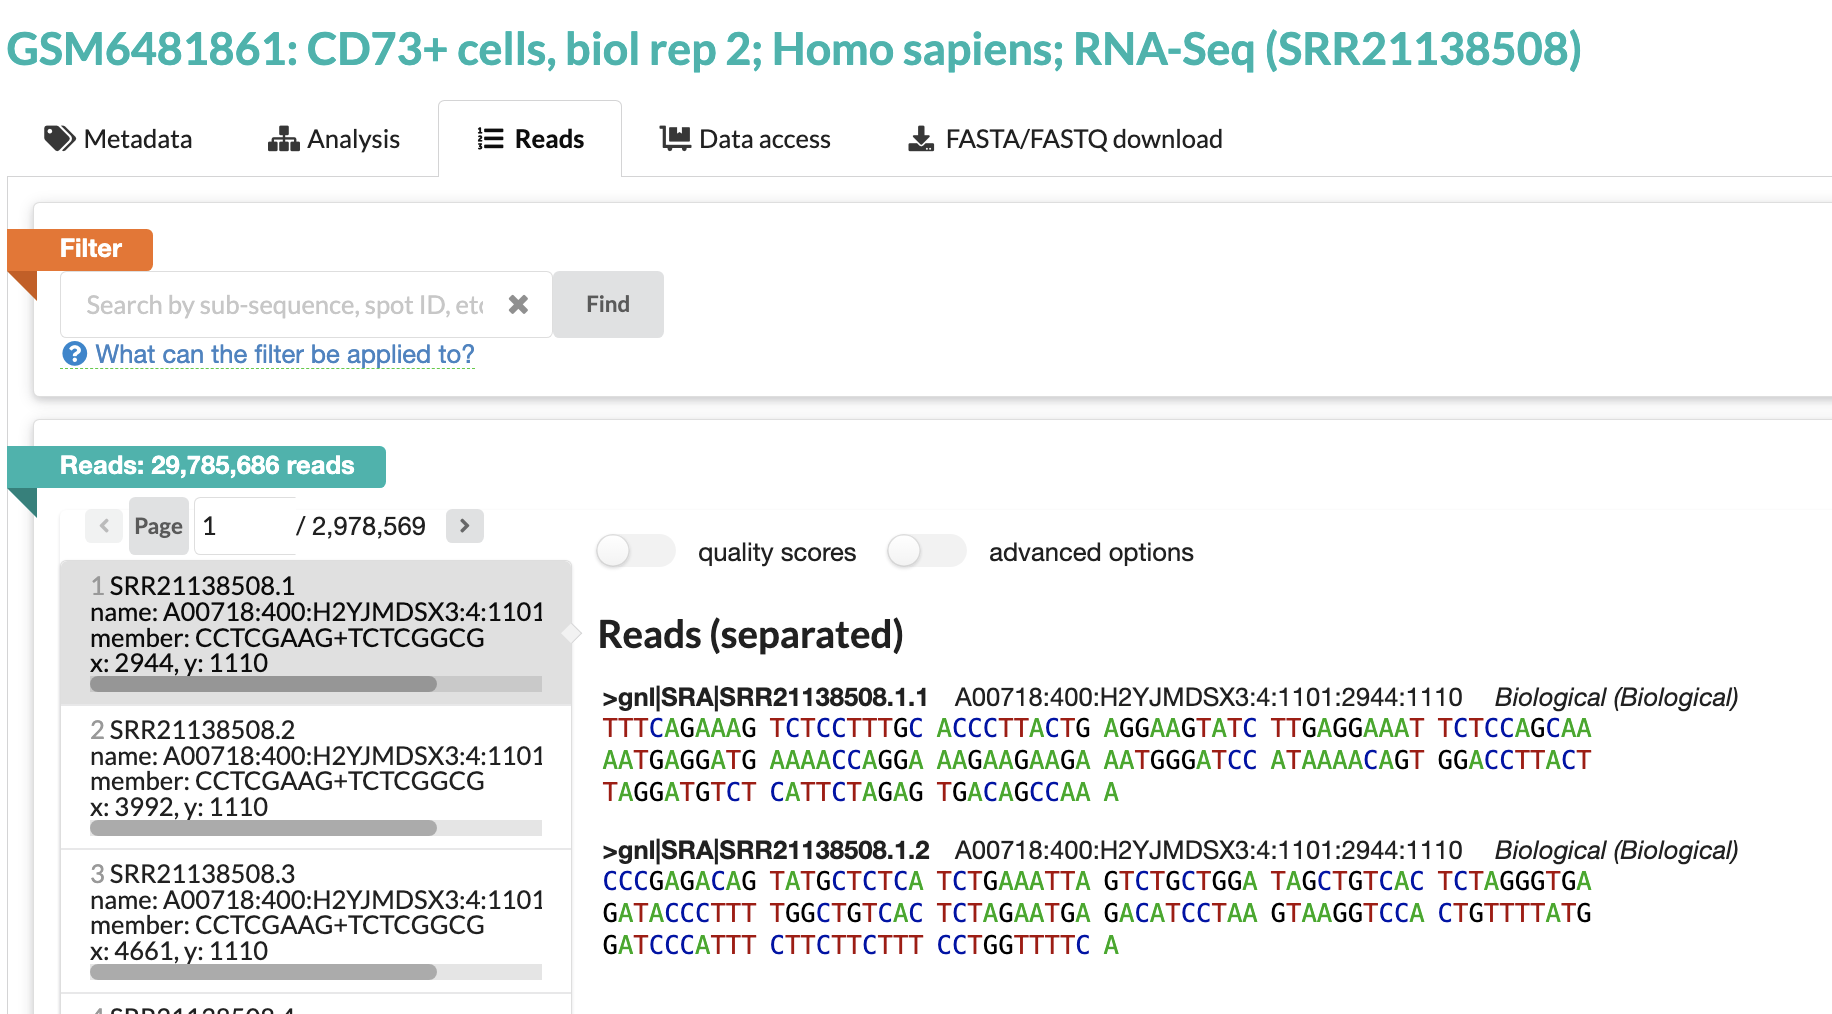

**cMSC_1**

In [13]:
echo $(cat fastq_files/cMSC_1.fastq | wc -l)/4 | bc

29738597


Downloaded 29,738,597 reads for cMSC_1.fastq, this is consistent with the number on SRA:

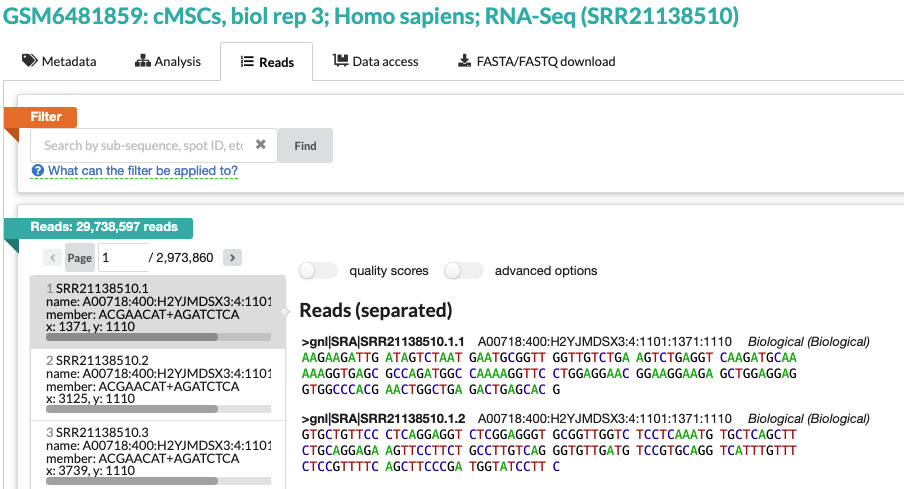

**cMSC_2**

In [14]:
echo $(cat fastq_files/cMSC_2.fastq | wc -l)/4 | bc

29646836


Downloaded 29,646,836 reads for cMSC_2.fastq, this is consistent with the number on SRA:

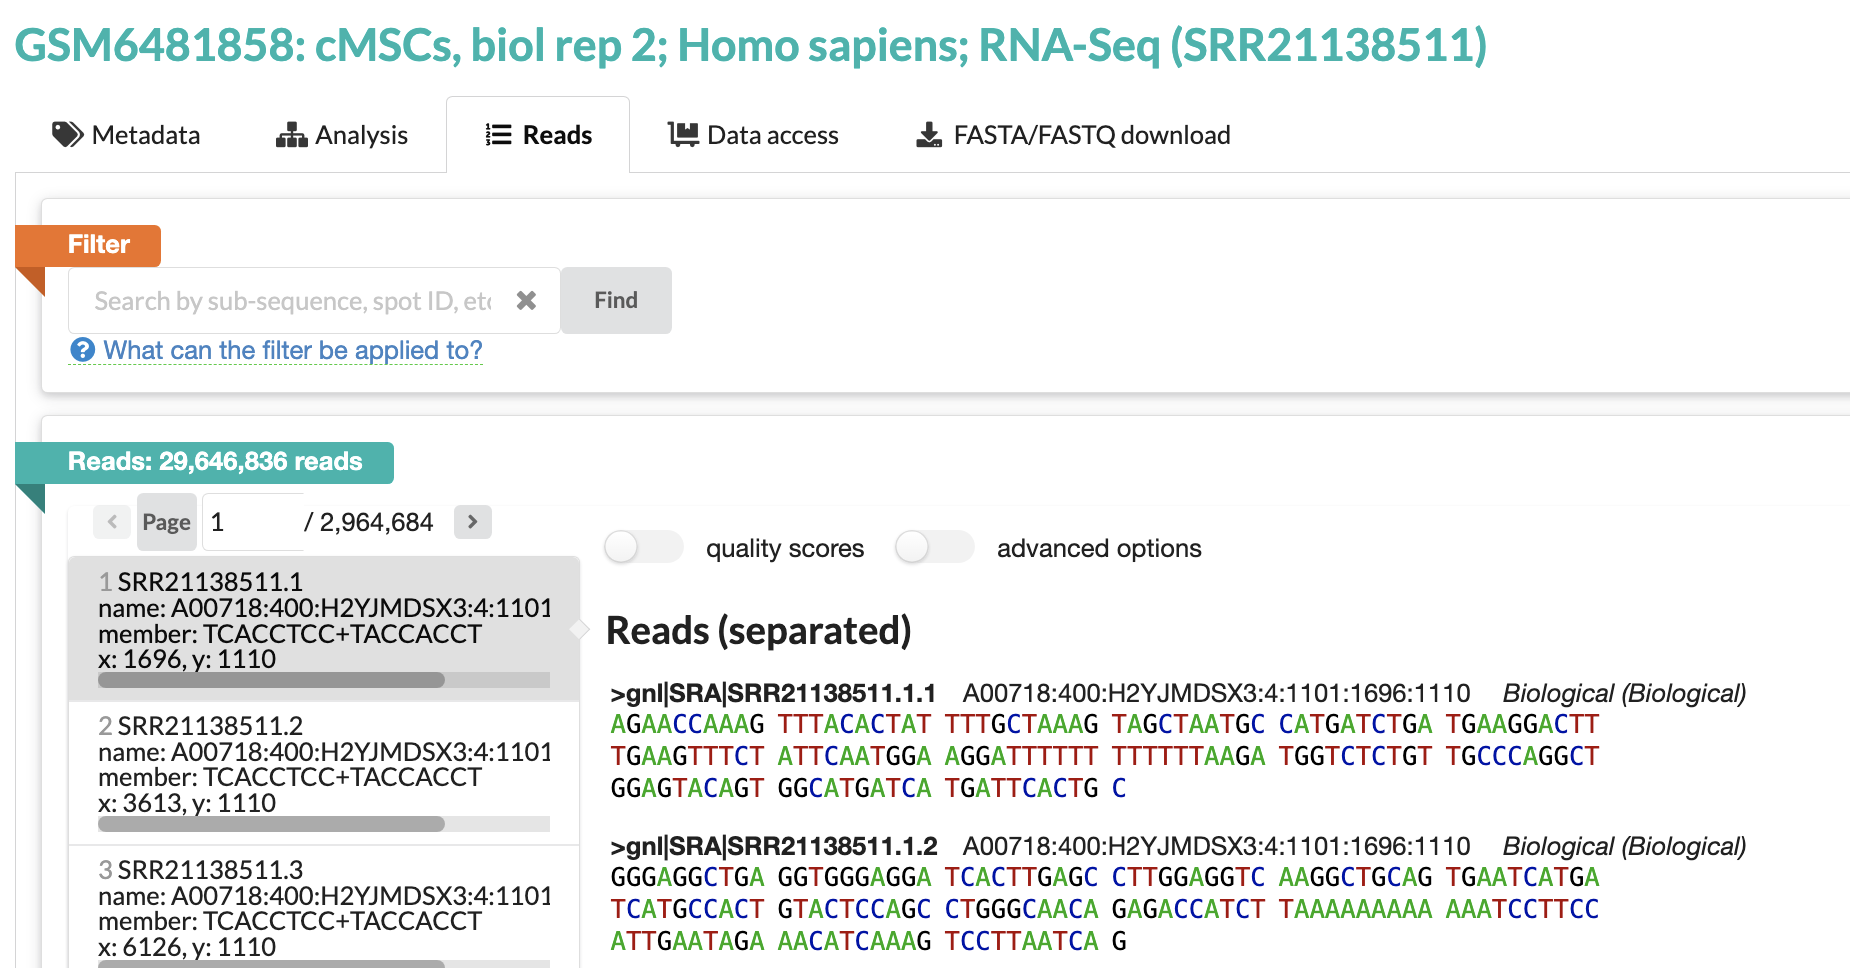

## Step 2: Quality control

The directory `fastqc_test` exists to contain fastqc files.

In [15]:
mkdir fastqc_test

Making FastQC reports

In [16]:
/usr/bin/fastqc -o fastqc_test fastq_files/CD73_1.fastq
/usr/bin/fastqc -o fastqc_test fastq_files/CD73_2.fastq

/usr/bin/fastqc -o fastqc_test fastq_files/cMSC_1.fastq
/usr/bin/fastqc -o fastqc_test fastq_files/cMSC_2.fastq

Started analysis of CD73_1.fastq
Approx 5% complete for CD73_1.fastq
Approx 10% complete for CD73_1.fastq
Approx 15% complete for CD73_1.fastq
Approx 20% complete for CD73_1.fastq
Approx 25% complete for CD73_1.fastq
Approx 30% complete for CD73_1.fastq
Approx 35% complete for CD73_1.fastq
Approx 40% complete for CD73_1.fastq
Approx 45% complete for CD73_1.fastq
Approx 50% complete for CD73_1.fastq
Too many tiles (>500) so giving up trying to do per-tile qualities since we're probably parsing the file wrongly
Approx 55% complete for CD73_1.fastq
Approx 60% complete for CD73_1.fastq
Approx 65% complete for CD73_1.fastq
Approx 70% complete for CD73_1.fastq
Approx 75% complete for CD73_1.fastq
Approx 80% complete for CD73_1.fastq
Approx 85% complete for CD73_1.fastq
Approx 90% complete for CD73_1.fastq
Approx 95% complete for CD73_1.fastq
Analysis complete for CD73_1.fastq
Started analysis of CD73_2.fastq
Approx 5% complete for CD73_2.fastq
Approx 10% complete for CD73_2.fastq
Approx 15% 

In [17]:
ls fastqc_test

CD73_1_fastqc.html  CD73_2_fastqc.html  cMSC_1_fastqc.html  cMSC_2_fastqc.html
CD73_1_fastqc.zip   CD73_2_fastqc.zip   cMSC_1_fastqc.zip   cMSC_2_fastqc.zip


### Quality of the CD73_1.fastq sample

There are 2 warnings and 2 failed tests. 

The per base quality of the sample is very high and consistent. 

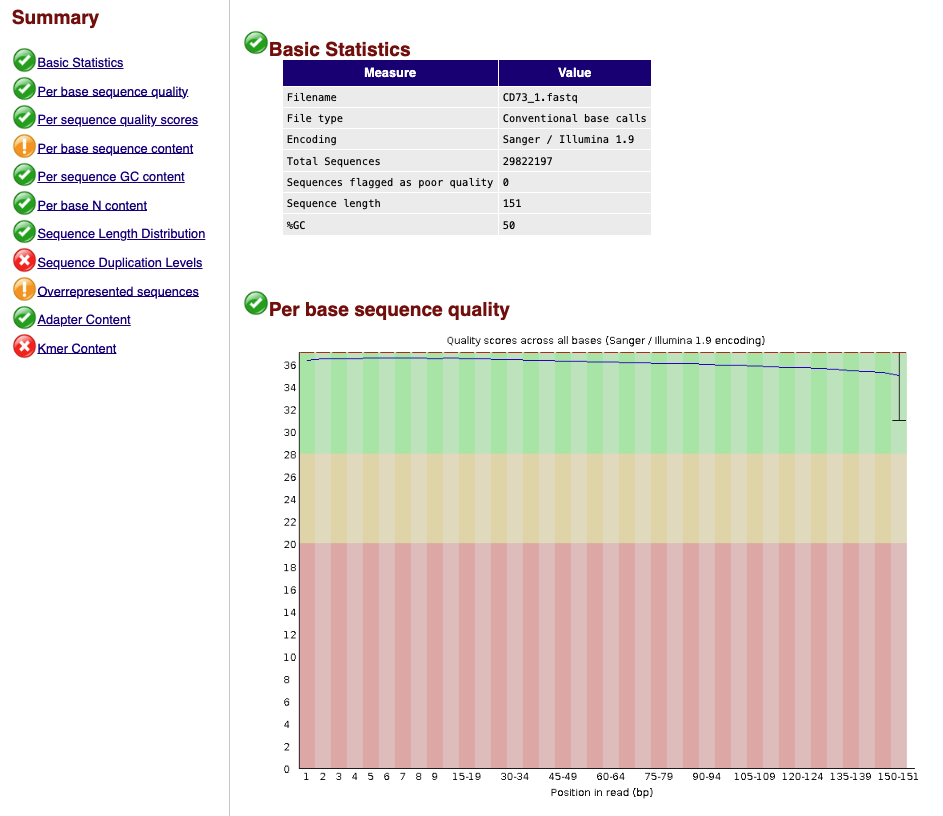

The lines in the graph below are expected to be parallel, irrespective of the position in read. In this sample, there are some irregularities at the very start, but the lines level out after the 10th position. This is a common occurrence in RNA samples, so should not be too critical. 

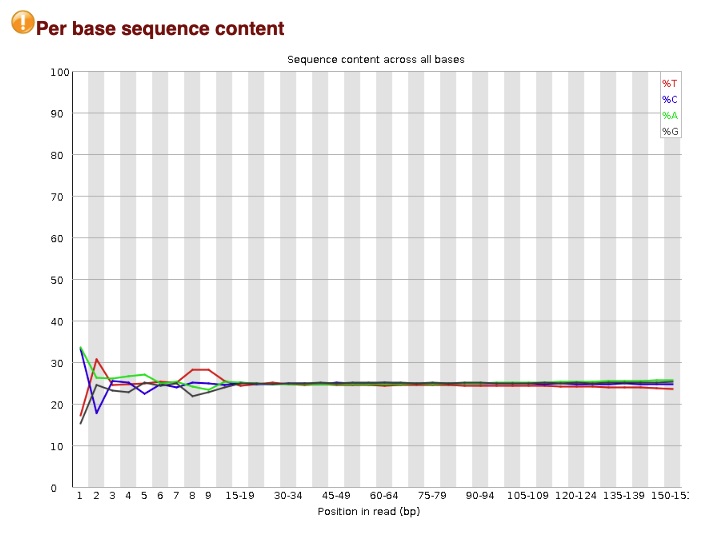

The sequence duplication levels are very high. The test failed, which means that more than 50% of the sequences are duplicated. On the graph you can see that there are a lot of sequences with a duplication level above 10, which is highly undesirable. 

This could indicate that the PCR was biased and therefore some sequences were overamplified. It could also indicate a low library complexity. 

Only one overrepresented sequence was detected and the source of it wasn't identified.

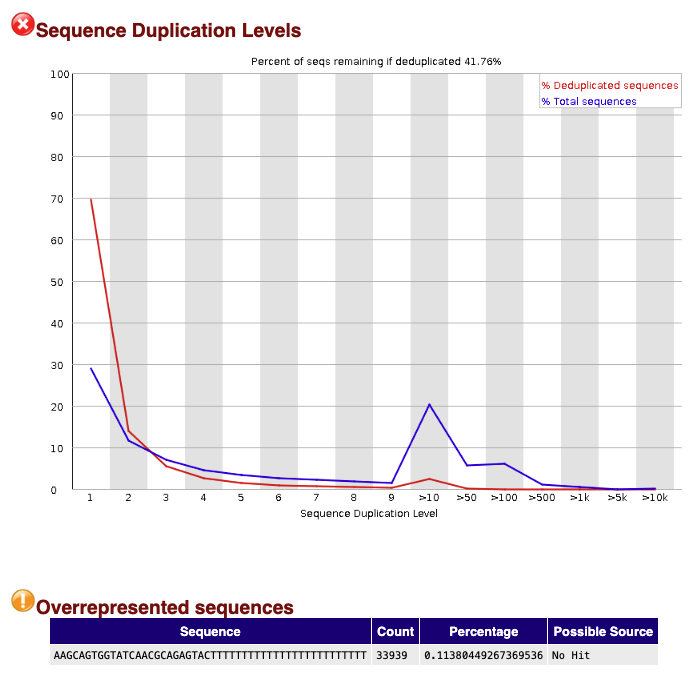

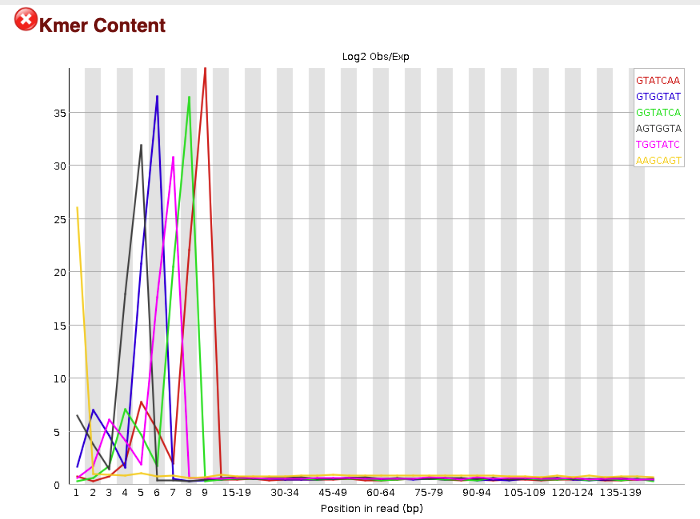

The section about the Kmer content also indicates that there is a possibility of biased amplification during PCR and possible adaptor contamination, though the test for the adaptor content passed. 

### Quality of the CD73_2.fastq, cMSC_1.fastq and cMSC_2.fastq samples

The quality of the other samples is quite similar. Therefore there is a clear systematic issue here, since there are consistent warnings or failures related to possible adaptor contamination and overrepresented sequences. 

### Filtering using fastp

The authors of the paper stated that they used `fastp` to filter the samples. Given the results of the quality analysis, some filtering steps are clearly needed. 

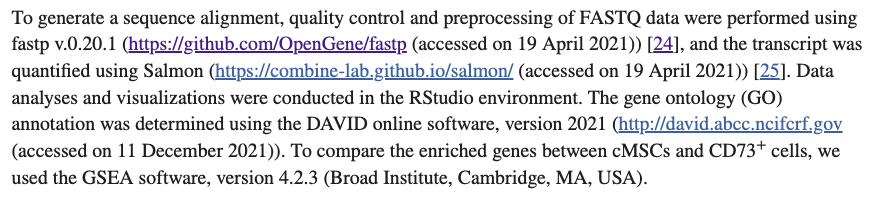

In [18]:
mkdir fastp

In [19]:
mkdir fastp_report

In [21]:
fastp -i fastq_files/CD73_1.fastq -o fastp/CD73_1_p.fastq --json fastp_report/CD73_1_report.json --html fastp_report/CD73_1_report.html
fastp -i fastq_files/CD73_2.fastq -o fastp/CD73_2_p.fastq --json fastp_report/CD73_2_report.json --html fastp_report/CD73_2_report.html

fastp -i fastq_files/cMSC_1.fastq -o fastp/cMSC_1_p.fastq --json fastp_report/cMSC_1_report.json --html fastp_report/cMSC_1_report.html
fastp -i fastq_files/cMSC_2.fastq -o fastp/cMSC_2_p.fastq --json fastp_report/cMSC_2_report.json --html fastp_report/cMSC_2_report.html

Detecting adapter sequence for read1...
>Illumina TruSeq Adapter Read 1
AGATCGGAAGAGCACACGTCTGAACTCCAGTCA

Read1 before filtering:
total reads: 29822197
total bases: 4503151747
Q20 bases: 4406956412(97.8638%)
Q30 bases: 4246037503(94.2903%)

Read1 after filtering:
total reads: 29717165
total bases: 4457220540
Q20 bases: 4369983410(98.0428%)
Q30 bases: 4212831499(94.517%)

Filtering result:
reads passed filter: 29717165
reads failed due to low quality: 101820
reads failed due to too many N: 2652
reads failed due to too short: 560
reads with adapter trimmed: 1386455
bases trimmed due to adapters: 30149133

Duplication rate (may be overestimated since this is SE data): 46.6362%

JSON report: fastp_report/CD73_1_report.json
HTML report: fastp_report/CD73_1_report.html

fastp -i fastq_files/CD73_1.fastq -o fastp/CD73_1_p.fastq --json fastp_report/CD73_1_report.json --html fastp_report/CD73_1_report.html 
fastp v0.23.2, time used: 84 seconds
Detecting adapter sequence for read1...
>Illumina 

In [22]:
ls fastp

CD73_1_p.fastq  CD73_2_p.fastq  cMSC_1_p.fastq  cMSC_2_p.fastq


In [23]:
ls fastp_report

CD73_1_report.html  CD73_2_report.html  cMSC_1_report.html  cMSC_2_report.html
CD73_1_report.json  CD73_2_report.json  cMSC_1_report.json  cMSC_2_report.json


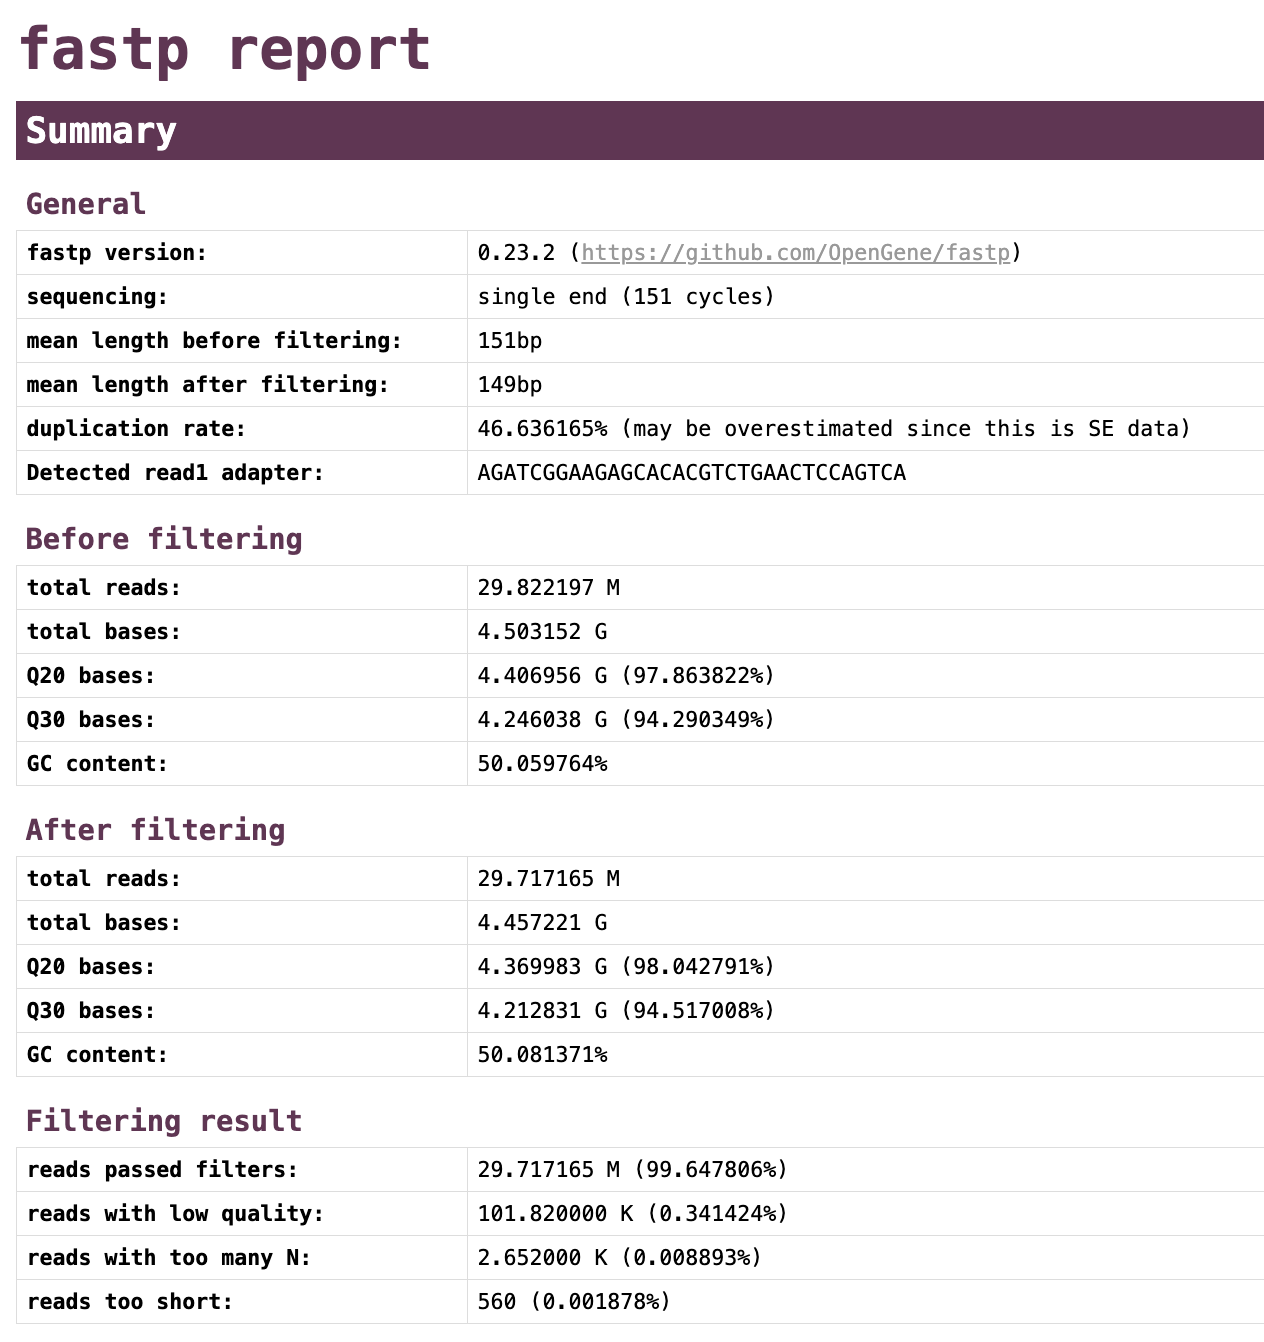

The filtering removed only a small proportion of the samples. However, without more specific information about how the filtering of the samples was done by the authors, it is difficult to completely replicate the results. Using the default parameters, most of the reads still passed the quality checks. 

## Step 3: Aligning reads to a reference genome

Using the pregenerated reference genome: `/mnt/storage/sdewin/STAR/star_db_hg38`

From now on, the filtered samples will be used. 

In [24]:
mkdir alignment

In [27]:
FILES_TO_ALIGN=`ls fastp | grep fastq`
echo "Following files will be aligned:" 
echo ${FILES_TO_ALIGN} | sed "s/ /, /g"              #Print fastq files and put commas between each file name
for fastq_file in ${FILES_TO_ALIGN}                  #Loop over all fastq files
do
    SAMPLE_NAME=`echo ${fastq_file} | cut -f 1 -d .` #Get the sample name by remove '.fastq'
    echo "Aligning ${SAMPLE_NAME}" 
    STAR \
        --genomeDir /mnt/storage/sdewin/STAR/star_db_hg38 \
        --runThreadN 20 \
        --readFilesIn fastp/${fastq_file} \
        --outFileNamePrefix alignment/${SAMPLE_NAME}. \
        --outSAMtype BAM SortedByCoordinate 
done

Following files will be aligned:
CD73_1_p.fastq, CD73_2_p.fastq, cMSC_1_p.fastq, cMSC_2_p.fastq
Aligning CD73_1_p
Dec 04 22:03:36 ..... started STAR run
Dec 04 22:03:36 ..... loading genome
Dec 04 22:04:26 ..... started mapping
Dec 04 22:06:15 ..... started sorting BAM
Dec 04 22:06:54 ..... finished successfully
Aligning CD73_2_p
Dec 04 22:06:57 ..... started STAR run
Dec 04 22:06:57 ..... loading genome
Dec 04 22:07:53 ..... started mapping
Dec 04 22:09:47 ..... started sorting BAM
Dec 04 22:10:27 ..... finished successfully
Aligning cMSC_1_p
Dec 04 22:10:30 ..... started STAR run
Dec 04 22:10:30 ..... loading genome
Dec 04 22:11:08 ..... started mapping
Dec 04 22:12:51 ..... started sorting BAM
Dec 04 22:13:48 ..... finished successfully
Aligning cMSC_2_p
Dec 04 22:13:51 ..... started STAR run
Dec 04 22:13:51 ..... loading genome
Dec 04 22:14:11 ..... started mapping
Dec 04 22:15:52 ..... started sorting BAM
Dec 04 22:16:47 ..... finished successfully


In [28]:
ls alignment

CD73_1_p.Aligned.sortedByCoord.out.bam  cMSC_1_p.Aligned.sortedByCoord.out.bam
CD73_1_p.Log.final.out                  cMSC_1_p.Log.final.out
CD73_1_p.Log.out                        cMSC_1_p.Log.out
CD73_1_p.Log.progress.out               cMSC_1_p.Log.progress.out
CD73_1_p.SJ.out.tab                     cMSC_1_p.SJ.out.tab
CD73_2_p.Aligned.sortedByCoord.out.bam  cMSC_2_p.Aligned.sortedByCoord.out.bam
CD73_2_p.Log.final.out                  cMSC_2_p.Log.final.out
CD73_2_p.Log.out                        cMSC_2_p.Log.out
CD73_2_p.Log.progress.out               cMSC_2_p.Log.progress.out
CD73_2_p.SJ.out.tab                     cMSC_2_p.SJ.out.tab


In [29]:
ls alignment | grep bam

CD73_1_p.Aligned.sortedByCoord.out.bam
CD73_2_p.Aligned.sortedByCoord.out.bam
cMSC_1_p.Aligned.sortedByCoord.out.bam
cMSC_2_p.Aligned.sortedByCoord.out.bam


In [30]:
cat alignment/CD73_1_p.Log.final.out

                                 Started job on |	Dec 04 22:03:36
                             Started mapping on |	Dec 04 22:04:26
                                    Finished on |	Dec 04 22:06:54
       Mapping speed, Million of reads per hour |	722.85

                          Number of input reads |	29717165
                      Average input read length |	149
                                    UNIQUE READS:
                   Uniquely mapped reads number |	28484245
                        Uniquely mapped reads % |	95.85%
                          Average mapped length |	149.38
                       Number of splices: Total |	19031242
            Number of splices: Annotated (sjdb) |	18875584
                       Number of splices: GT/AG |	18855995
                       Number of splices: GC/AG |	105791
                       Number of splices: AT/AC |	13547
               Number of splices: Non-canonical |	55909
                      Mismatch rate per base, % |	0.25%
      

In [31]:
cat alignment/CD73_2_p.Log.final.out

                                 Started job on |	Dec 04 22:06:57
                             Started mapping on |	Dec 04 22:07:53
                                    Finished on |	Dec 04 22:10:27
       Mapping speed, Million of reads per hour |	694.09

                          Number of input reads |	29691493
                      Average input read length |	149
                                    UNIQUE READS:
                   Uniquely mapped reads number |	28608005
                        Uniquely mapped reads % |	96.35%
                          Average mapped length |	149.21
                       Number of splices: Total |	18620078
            Number of splices: Annotated (sjdb) |	18458385
                       Number of splices: GT/AG |	18437243
                       Number of splices: GC/AG |	113966
                       Number of splices: AT/AC |	14339
               Number of splices: Non-canonical |	54530
                      Mismatch rate per base, % |	0.25%
      

In [32]:
cat alignment/cMSC_1_p.Log.final.out

                                 Started job on |	Dec 04 22:10:30
                             Started mapping on |	Dec 04 22:11:08
                                    Finished on |	Dec 04 22:13:48
       Mapping speed, Million of reads per hour |	666.80

                          Number of input reads |	29635596
                      Average input read length |	150
                                    UNIQUE READS:
                   Uniquely mapped reads number |	28437199
                        Uniquely mapped reads % |	95.96%
                          Average mapped length |	149.59
                       Number of splices: Total |	18526415
            Number of splices: Annotated (sjdb) |	18350886
                       Number of splices: GT/AG |	18343261
                       Number of splices: GC/AG |	106859
                       Number of splices: AT/AC |	12996
               Number of splices: Non-canonical |	63299
                      Mismatch rate per base, % |	0.25%
      

In [33]:
cat alignment/cMSC_2_p.Log.final.out

                                 Started job on |	Dec 04 22:13:51
                             Started mapping on |	Dec 04 22:14:11
                                    Finished on |	Dec 04 22:16:47
       Mapping speed, Million of reads per hour |	681.90

                          Number of input reads |	29548895
                      Average input read length |	150
                                    UNIQUE READS:
                   Uniquely mapped reads number |	28477735
                        Uniquely mapped reads % |	96.37%
                          Average mapped length |	149.59
                       Number of splices: Total |	18987060
            Number of splices: Annotated (sjdb) |	18802947
                       Number of splices: GT/AG |	18780474
                       Number of splices: GC/AG |	118075
                       Number of splices: AT/AC |	15366
               Number of splices: Non-canonical |	73145
                      Mismatch rate per base, % |	0.25%
      

Viewing the `.bam` file:

In [34]:
samtools view alignment/CD73_1_p.Aligned.sortedByCoord.out.bam | head -n 1

SRR21138507.18088871	256	chr1	14052	1	151M	*	0	0	TCCTCCAAGTCGATGGCACCTCCCTCCCTCTCAACCACTTGAGCAAACTCCAAGACATCTTCTACCCCAACACCAGCAATTGTGCCAAGGGCCATTAGGCTCTCAGCATGACTATTTTTAGAGACCCCGTGTCTGTCACTGAAACCTTTTT	FFFFFFFFFFFFFFFF,::FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFFFFFFFF,FFFF	NH:i:4	HI:i:2	AS:i:149	nM:i:0
samtools view: writing to standard output failed: Broken pipe
samtools view: error closing standard output: -1


We can get info on the different SAM flags present in the file:

In [35]:
samtools flagstat alignment/CD73_1_p.Aligned.sortedByCoord.out.bam

30676515 + 0 in total (QC-passed reads + QC-failed reads)
1364855 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
30676515 + 0 mapped (100.00% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [36]:
samtools flagstat alignment/CD73_2_p.Aligned.sortedByCoord.out.bam

30459115 + 0 in total (QC-passed reads + QC-failed reads)
1092945 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
30459115 + 0 mapped (100.00% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [37]:
samtools flagstat alignment/cMSC_1_p.Aligned.sortedByCoord.out.bam

30619658 + 0 in total (QC-passed reads + QC-failed reads)
1355060 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
30619658 + 0 mapped (100.00% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [38]:
samtools flagstat alignment/cMSC_2_p.Aligned.sortedByCoord.out.bam

30337559 + 0 in total (QC-passed reads + QC-failed reads)
1104272 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
30337559 + 0 mapped (100.00% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


Making `.bai` files if necessary

In [39]:
samtools index alignment/CD73_1_p.Aligned.sortedByCoord.out.bam
samtools index alignment/CD73_2_p.Aligned.sortedByCoord.out.bam

samtools index alignment/cMSC_1_p.Aligned.sortedByCoord.out.bam
samtools index alignment/cMSC_2_p.Aligned.sortedByCoord.out.bam

## Step 4: Count the number of reads that overlap

Making a symbolic link

In [40]:
ln -sf /mnt/storage/sdewin/STAR/star_db_hg38/gencode.v26.primary_assembly.annotation.gtf .

In [41]:
head gencode.v26.primary_assembly.annotation.gtf

##description: evidence-based annotation of the human genome (GRCh38), version 26 (Ensembl 88)
##provider: GENCODE
##contact: gencode-help@sanger.ac.uk
##format: gtf
##date: 2017-03-14
chr1	HAVANA	gene	11869	14409	.	+	.	gene_id "ENSG00000223972.5"; gene_type "transcribed_unprocessed_pseudogene"; gene_name "DDX11L1"; level 2; havana_gene "OTTHUMG00000000961.2";
chr1	HAVANA	transcript	11869	14409	.	+	.	gene_id "ENSG00000223972.5"; transcript_id "ENST00000456328.2"; gene_type "transcribed_unprocessed_pseudogene"; gene_name "DDX11L1"; transcript_type "processed_transcript"; transcript_name "DDX11L1-002"; level 2; transcript_support_level "1"; tag "basic"; havana_gene "OTTHUMG00000000961.2"; havana_transcript "OTTHUMT00000362751.1";
chr1	HAVANA	exon	11869	12227	.	+	.	gene_id "ENSG00000223972.5"; transcript_id "ENST00000456328.2"; gene_type "transcribed_unprocessed_pseudogene"; gene_name "DDX11L1"; transcript_type "processed_transcript"; transcript_name "DDX11L1-002"; exon_number 1; exon_id 

Counting the reads that overlap:

In [42]:
mkdir counts

In [43]:
ls alignment | grep bam

CD73_1_p.Aligned.sortedByCoord.out.bam
CD73_1_p.Aligned.sortedByCoord.out.bam.bai
CD73_2_p.Aligned.sortedByCoord.out.bam
CD73_2_p.Aligned.sortedByCoord.out.bam.bai
cMSC_1_p.Aligned.sortedByCoord.out.bam
cMSC_1_p.Aligned.sortedByCoord.out.bam.bai
cMSC_2_p.Aligned.sortedByCoord.out.bam
cMSC_2_p.Aligned.sortedByCoord.out.bam.bai


To check the alignment, the `.bam` and `.bai` files were loaded into IGV and the expression of a regular housekeeping gene GAPDH was checked. As can be seen in the image below, the expression is present in all of the samples and is consistent with the reference. 
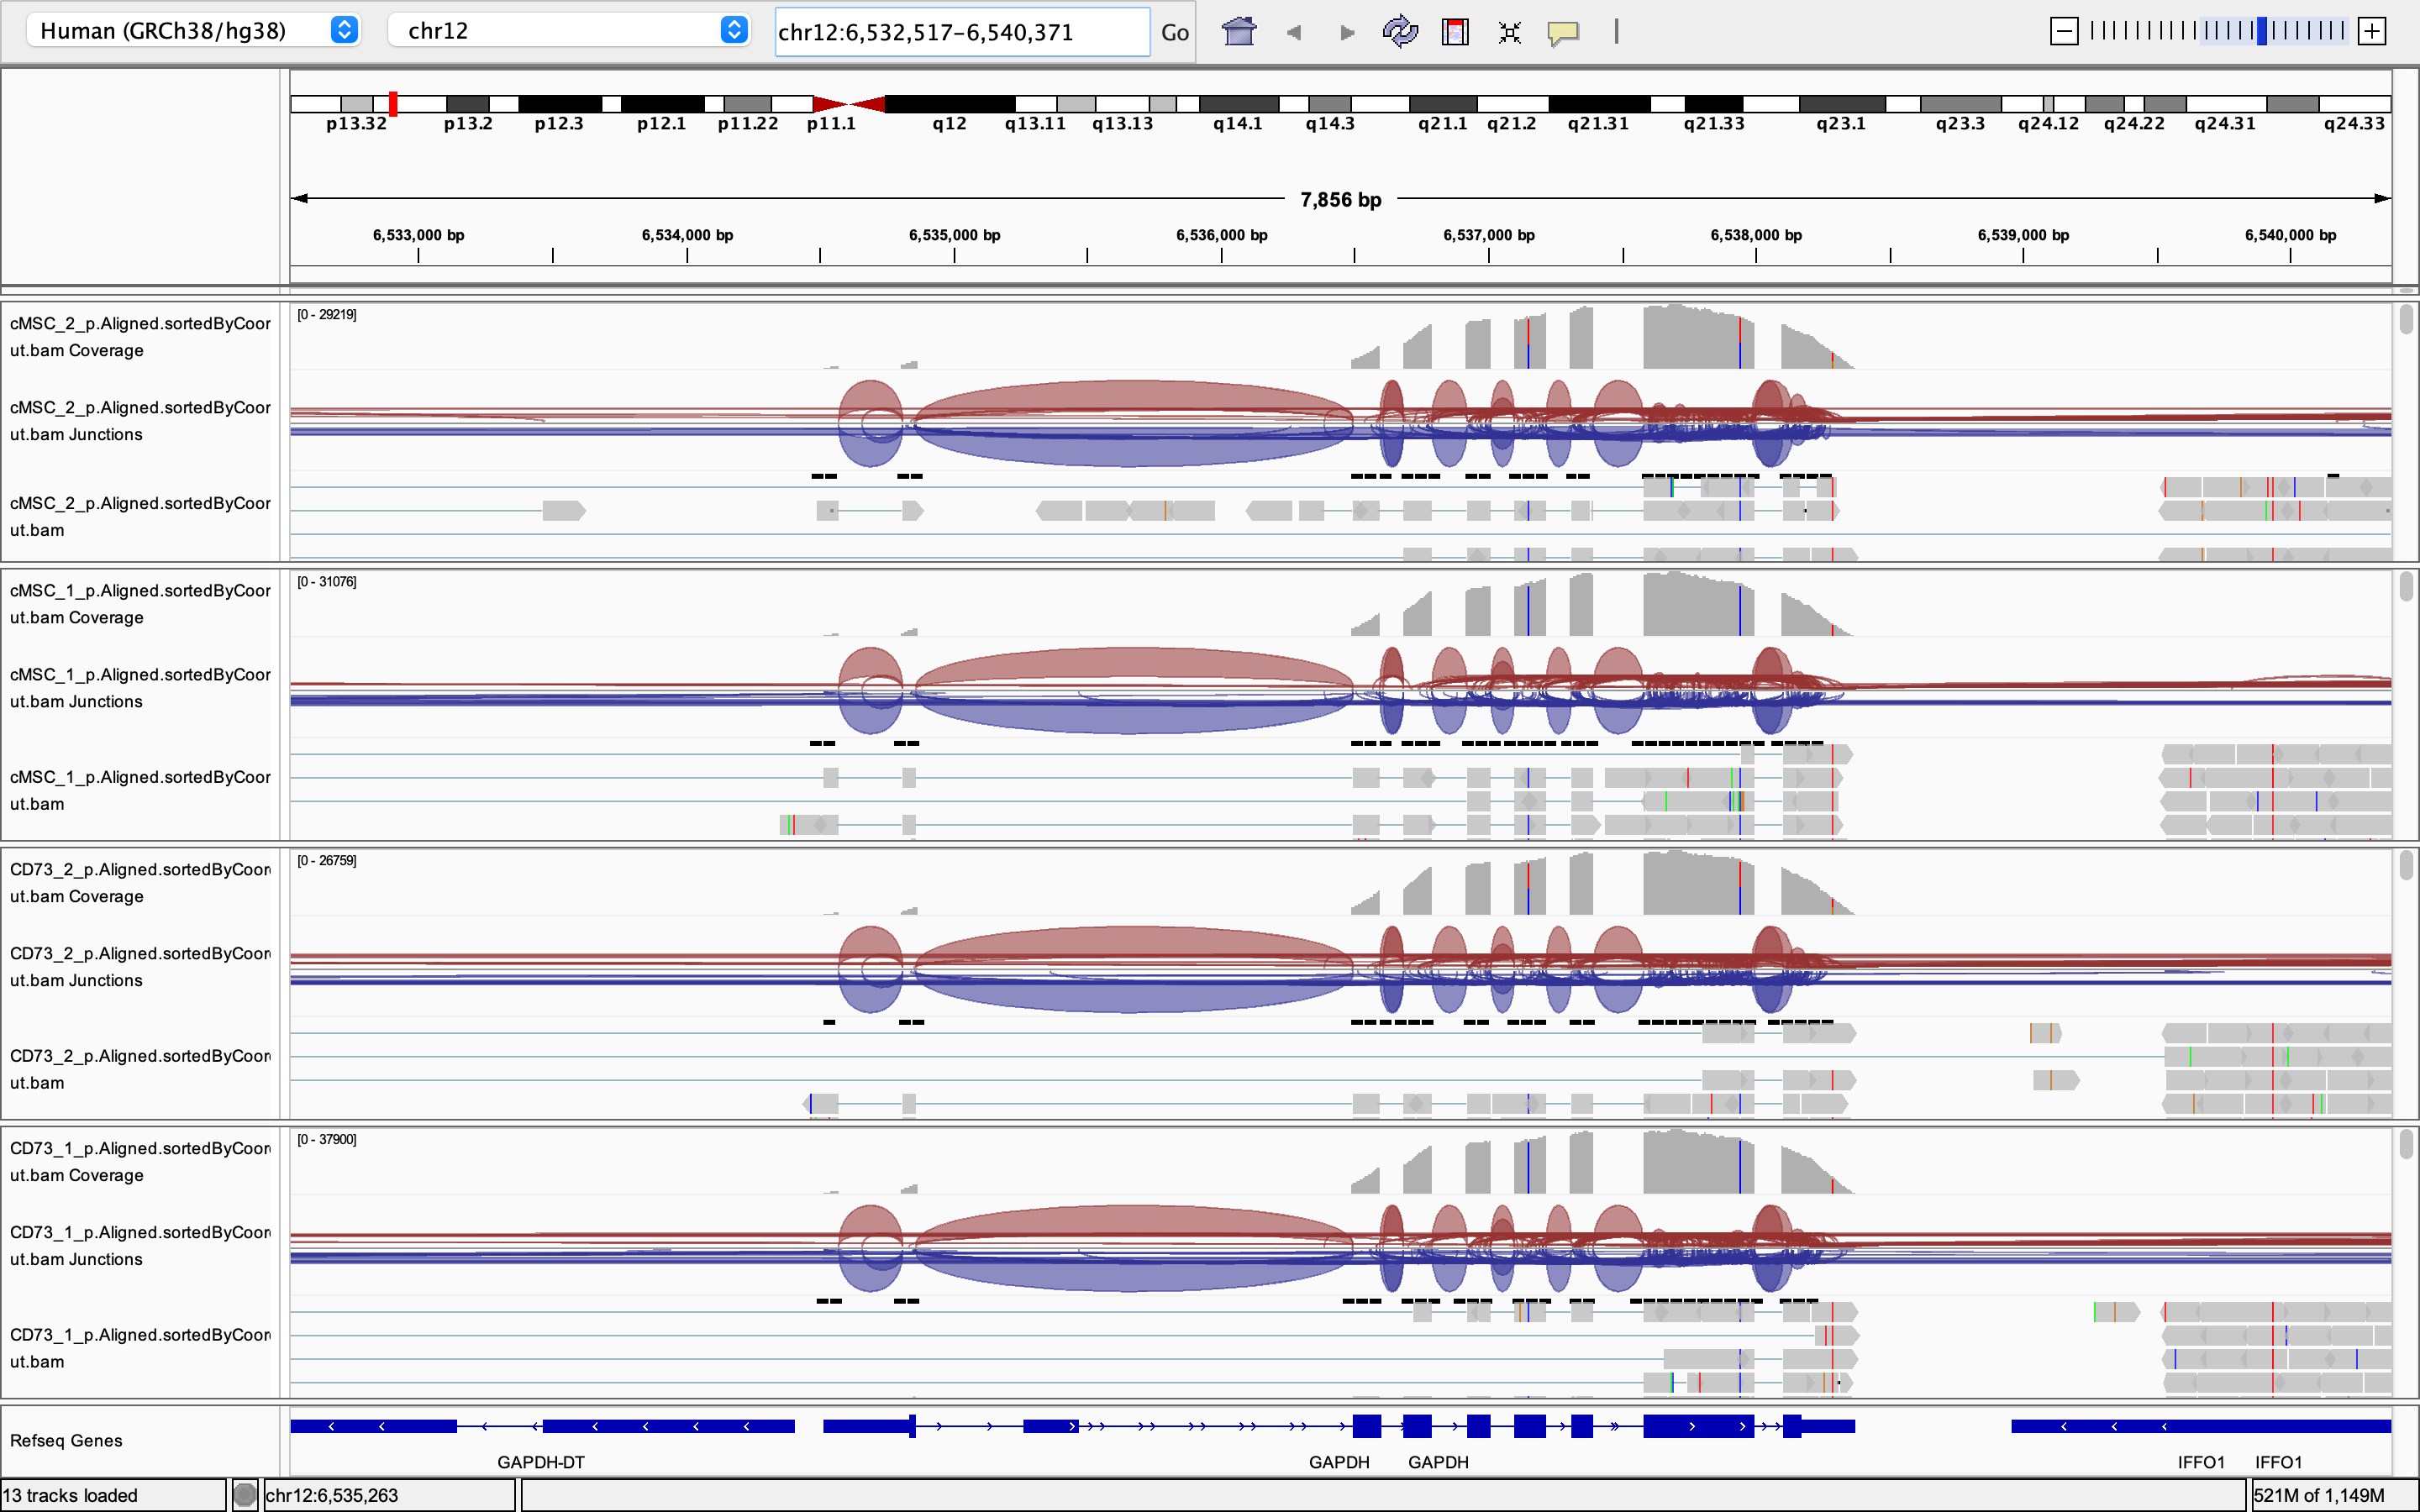

In [44]:
#-Q 10 only count reads with a minimum mapping quality of 10
#-g gene_name use gene_name as feature names (you can also use gene_id, although this is less human readable)
#-a gencode.v26.primary_assembly.annotation.gtf specify the annotation file
#-o counts/mcf7_ns_s.count specify the output file
#alignment/*.bam count for all the bam files in the alignment folder
featureCounts \
    -Q 10 \
    -g gene_name \
    -a gencode.v26.primary_assembly.annotation.gtf \
    -o counts/mcf7_ns_s.counts \
    alignment/*.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 4 BAM files                                      ||
||                           S alignment/CD73_1_p.Aligned.sortedByCoord.o ... ||
||                           S alignment/CD73_2_p.Aligned.sortedByCoord.o ... ||
||                           S alignment/cMSC_1_p.Aligned.sortedByCoord.o ... ||
||                           S alignment/cMSC_2_p.Aligned.sortedB

In [45]:
ls counts

mcf7_ns_s.counts  mcf7_ns_s.counts.summary


In [46]:
head counts/mcf7_ns_s.counts

# Program:featureCounts v1.6.0; Command:"featureCounts" "-Q" "10" "-g" "gene_name" "-a" "gencode.v26.primary_assembly.annotation.gtf" "-o" "counts/mcf7_ns_s.counts" "alignment/CD73_1_p.Aligned.sortedByCoord.out.bam" "alignment/CD73_2_p.Aligned.sortedByCoord.out.bam" "alignment/cMSC_1_p.Aligned.sortedByCoord.out.bam" "alignment/cMSC_2_p.Aligned.sortedByCoord.out.bam" 
Geneid	Chr	Start	End	Strand	Length	alignment/CD73_1_p.Aligned.sortedByCoord.out.bam	alignment/CD73_2_p.Aligned.sortedByCoord.out.bam	alignment/cMSC_1_p.Aligned.sortedByCoord.out.bam	alignment/cMSC_2_p.Aligned.sortedByCoord.out.bam
DDX11L1	chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1	11869;12010;12179;12613;12613;12975;13221;13221;13453	12227;12057;12227;12721;12697;13052;13374;14409;13670	+;+;+;+;+;+;+;+;+	1735	0	0	0	0
WASH7P	chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1	14404;15005;15796;16607;16858;17233;17606;17915;18268;24738;29534	14501;15038;15947;16765;17055;17368;17742;18061;18366;24891;29570	-;-;-;-;-;-;-

Formatting the output:

In [47]:
head counts/mcf7_ns_s.counts \
    | grep -v "#" \
    | cut -f 1,7,8,9,10,11,12 \
    | sed "s/alignment\///g" \
    | sed "s/.Aligned.sortedByCoord.out.bam//g" \
    | column -t

Geneid       CD73_1_p  CD73_2_p  cMSC_1_p  cMSC_2_p
DDX11L1      0         0         0         0
WASH7P       0         2         0         2
MIR6859-1    0         0         2         1
MIR1302-2HG  0         0         0         0
MIR1302-2    0         0         0         0
FAM138A      0         0         0         0
OR4G4P       0         0         0         0
OR4G11P      0         0         0         0


Saving the count matrix:

In [48]:
cat counts/mcf7_ns_s.counts \
    | grep -v "#" \
    | cut -f 1,7,8,9,10,11,12 \
    | sed "s/alignment\///g" \
    | sed "s/.Aligned.sortedByCoord.out.bam//g" \
    > counts/mcf7_ns_s.counts.formatted

In [49]:
head counts/mcf7_ns_s.counts.formatted | column -t

Geneid       CD73_1_p  CD73_2_p  cMSC_1_p  cMSC_2_p
DDX11L1      0         0         0         0
WASH7P       0         2         0         2
MIR6859-1    0         0         2         1
MIR1302-2HG  0         0         0         0
MIR1302-2    0         0         0         0
FAM138A      0         0         0         0
OR4G4P       0         0         0         0
OR4G11P      0         0         0         0
OR4F5        0         0         0         0


Looking at the counts of genes that should be different between the samples. The section below lists the genes that the authors found to be significantly upregulated in the CD73 samples. 

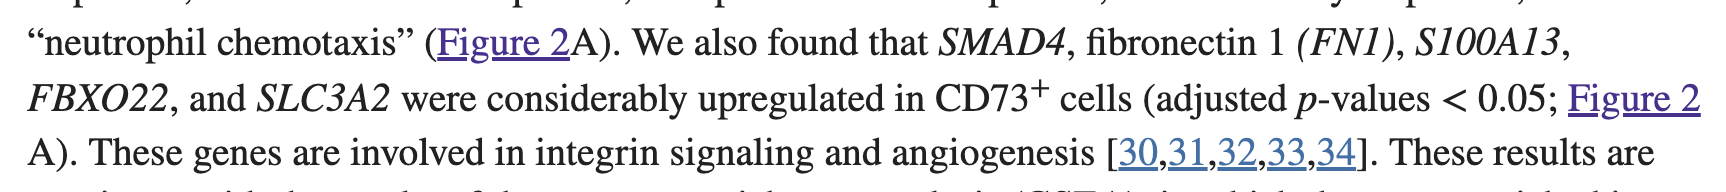

In [50]:
cat counts/mcf7_ns_s.counts.formatted | grep SMAD4

SMAD4	1244	1329	1209	1385


In [51]:
cat counts/mcf7_ns_s.counts.formatted | grep S100A13

S100A13	1662	1858	1200	1794


In [52]:
cat counts/mcf7_ns_s.counts.formatted | grep FBXO22

FBXO22	1033	1460	1213	1334


In [53]:
cat counts/mcf7_ns_s.counts.formatted | grep SLC3A2

SLC3A2	10141	8805	8327	9191


However the counts are quite similar, so there may not be any significant upregulation. 